In [1]:
%reset
import numpy as np
import pylab
import matplotlib
import matplotlib.pyplot as plt

%run ../DataGenerationScripts/set_size.ipynb # loading function for pdf output sizer

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
h=2.8*0.393701 #inch
w=2.8*0.393701 #inch

alpha_value=0.6
col='gray'
marker_sizer=2.5
mrksize=10
margin=0.4 #relative

font = {'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)

fixed point 1 is (B,R)=(4.999999999999986e-06 , 4.999999999999986e-06) and the eigenvalues at this point are -0.013245691721504693 ,-1.8867455582784955
fixed point 2 is (B,R)=(0.028874999999999998 , 0.028874999999999998) and the eigenvalues at this point are 0.013267714287084287 ,-1.8627810374822937
fixed point 3 is (B,R)=(0.9156849999999999 , 0.9156849999999999) and the eigenvalues at this point are -0.5152248122206156 ,-1.203821713208938


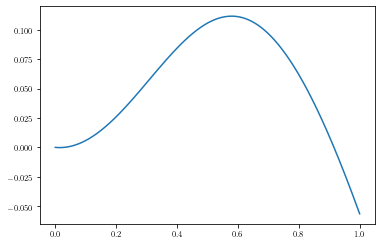

In [3]:
K_SB = 7./8.
k_DR = 0.0005
k_BR = 1
alpha = K_SB/0.9

# D can take the values 0; 0.2; 0.3; 0.34; 0.38 ~0.4103036; 1. # for D=1. we should only consider (b1,r1) and e1, e2 since only 1 fixed point remains after the saddle-node bifurcation.
D =0

def curve(B): # the intersection of this curve and the horizontal axis R=0 gives the solutions for B which form a maximum of 3 fixed points.
    return -0.9*B + K_SB*(np.exp(2.*(B**2.+k_BR*B+k_DR*D))-1.)/(np.exp(2.*(B**2.+k_BR*B+k_DR*D))+1.)

def linear_R(B):
    return k_BR*B+k_DR*D

def nonlinear_R(alpha,B):
    return -B**2. +0.5*np.log((lamb+B)/(lamb-B))

b = np.arange(-0.0001,1.0001,0.00001)
out = curve(b)

pylab.ion()
pylab.figure()
pylab.plot(b,out)

ind = np.where(out<0.)[0] # when the curve is negative for the first time it means that it has crossed zero just before that
jump_ind = np.where(np.diff(ind)>1.)[0] # this finds the index of the value of the curve that forms the saddle point in between the three fixed points

# we approximate the solutions to be the average of B values right before and after zero crossing
b1 = 0.5*(b[ind[0]]+b[ind[0]-1])
b2 = 0.5*(b[ind[jump_ind]+1]+b[ind[jump_ind]])[0]
b3 = 0.5*(b[ind[jump_ind+1]-1]+b[ind[jump_ind+1]])[0]

r1 = linear_R(b1)
r2 = linear_R(b2)
r3 = linear_R(b3)

def Jac(b,r):
    dbdb = -0.9 + 7.*b*np.exp(2.*(b**2.+r))/((np.exp(2.*(b**2.+r))+1.)**2)
    dbdr = 7.*np.exp(2.*(b**2.+r))/(2.*(np.exp(2.*(b**2.+r))+1.)**2)
    drdb = 1.
    drdr = -1.
    return [[dbdb, dbdr],[drdb, drdr]]

e1, e2 = np.linalg.eigvals(Jac(b1,r1))	# eigenvalues of fixed point 1 closest to the origin
ee1, ee2 = np.linalg.eigvals(Jac(b2,r2))	# eigenvalues of fixed point 2 which is a saddle if it exists
eee1, eee2 = np.linalg.eigvals(Jac(b3,r3))	# eigenvalues of fixed point 3 which is the farthest from the origin and is always stable

# all negative eigenvalues for a single fixed point means a stable fixed point (attractor). At least 1 positive eigenvalue means there is at least one unstable manifold, and that indicates a saddle point if the other eigenvalue is negative.
print('fixed point 1 is (B,R)=('+str(b1)+' , '+str(r1)+') and the eigenvalues at this point are '+str(e1)+' ,'+str(e2))
print('fixed point 2 is (B,R)=('+str(b2)+' , '+str(r2)+') and the eigenvalues at this point are '+str(ee1)+' ,'+str(ee2))
print('fixed point 3 is (B,R)=('+str(b3)+' , '+str(r3)+') and the eigenvalues at this point are '+str(eee1)+' ,'+str(eee2))

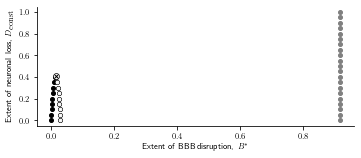

In [4]:
D_critical=0.4103036 # to see calculation of this value and respective steady state values of other variables, see Appendix section 7 "Estimation of critical extent of neuronal loss"

d = np.arange(0,1.001,0.05)
b = np.arange(-0.0001,1.0001,0.00001)

fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1)

for ii in range(0,len(d)):
    D=d[ii]
    if D<=D_critical:
    
        b = np.arange(-0.0001,1.0001,0.00001)
        out = curve(b)
        
        ind = np.where(out<0.)[0]	# when the curve is negative for the first time it means that it has crossed zero just before that
        jump_ind = np.where(np.diff(ind)>1.)[0]	# this finds the index of the value of the curve that forms the saddle point in between the three fixed points

        b1 = 0.5*(b[ind[0]]+b[ind[0]-1])
        b2 = 0.5*(b[ind[jump_ind]+1]+b[ind[jump_ind]])[0]
        b3 = 0.5*(b[ind[jump_ind+1]-1]+b[ind[jump_ind+1]])[0]

        r1 = linear_R(b1)
        r2 = linear_R(b2)
        r3 = linear_R(b3)
    
        e1, e2 = np.linalg.eigvals(Jac(b1,r1)) # eigenvalues of fixed point 1 closest to the origin
        ee1, ee2 = np.linalg.eigvals(Jac(b2,r2)) # eigenvalues of fixed point 2 which is a saddle if it exists
        eee1, eee2 = np.linalg.eigvals(Jac(b3,r3)) # eigenvalues of fixed point 3 which is the farthest from the origin and is always stable
 
        col='black'
        if e1<0 and e2<0:
            plt.plot(b1,D, 'o',color=col, markersize=mrksize/marker_sizer)  
        elif (e1<0 and e2>0) or (e1>0 and e2<0):
            plt.plot(b1,D, 'o',color=col, markersize=mrksize/marker_sizer)  
            plt.plot(b1,D,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
            
        if ee1<0 and ee2<0:
            plt.plot(b2,D, 'o',color=col, markersize=mrksize/marker_sizer)  
        elif (ee1<0 and ee2>0) or (ee1>0 and ee2<0):
            plt.plot(b2,D, 'o',color=col, markersize=mrksize/marker_sizer)  
            plt.plot(b2,D,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
        
        col='grey'    
        if eee1<0 and eee2<0:
            plt.plot(b3,D, 'o',color=col, markersize=mrksize/marker_sizer)  
        elif (e1<0 and e2>0) or (e1>0 and e2<0):
            plt.plot(b3,D, 'o',color=col, markersize=mrksize/marker_sizer)  
            plt.plot(b3,D,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer) 
            
    else:
    
        b = np.arange(-0.0001,1.0001,0.00001)
        out = curve(b)
        
        ind = np.where(out<0.)[0] # when the curve is negative for the first time it means that it has crossed zero just before that
        jump_ind = np.where(np.diff(ind)>1.)[0]	# this finds the index of the value of the curve that forms the saddle point in between the three fixed points

        b1 = 0.5*(b[ind[0]]+b[ind[0]-1])
        
        r1 = linear_R(b1)
        
        e1, e2 = np.linalg.eigvals(Jac(b1,r1)) # eigenvalues of the only fixed point
        col='gray'

        if e1<0 and e2<0:
            plt.plot(b1,D, 'o',color=col, markersize=mrksize/marker_sizer)  
        elif (e1<0 and e2>0) or (e1>0 and e2<0):
            plt.plot(b1,D, 'o',color=col, markersize=mrksize/marker_sizer)  
            plt.plot(b1,D,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)

mrksize = 14
col='black'

b_critical=0.0143
plt.plot(b_critical,D_critical, 'o',color=col, markersize=mrksize/marker_sizer)         
plt.plot(b_critical,D_critical,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
plt.plot(b_critical,D_critical,'x',color=col, markersize=mrksize/marker_sizer-3/marker_sizer)   
              
plt.ylabel(r'Extent of neuronal loss, $D_{\textnormal{const}}$')
plt.xlabel(r'Extent of BBB disruption, $B^*$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
plt.gcf().subplots_adjust(right=1-margin/2)
set_size(4*w,1.5*w) 
fig.savefig('../Figures/Supplementary/Fig_A3.pdf')